# <u>MODEL EVALUATION</u>

In [72]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
import plotly.express as px

from common_functions import *
# from evaluation_utils import *

In [73]:
%store -r COI MICROSTATES NON_CONFLICT_COUNTRIES CONFLICT_COUNTRIES acled_by_country

In [74]:
colors = sns.color_palette("deep").as_hex()
quarterly_colors = sns.color_palette("pastel").as_hex()

models_color_palette = {
    'NO_CHANGE_MONTHLY':colors[0], 
    'ARIMA_MONTHLY': colors[1],
    'SARIMA_MONTHLY': colors[2], 
    'ARIMAX_N_MONTHLY':colors[3],
    'ARIMAX_SE_MONTHLY':colors[4],
    'SARIMAX_N_MONTHLY':colors[5],
    'SARIMAX_SE_MONTHLY':colors[6],
    "ARIMAX_SE+N_MONTHLY": colors[7],
    'SARIMAX_SE+N_MONTHLY':colors[8],
    
    'NO_CHANGE_QUARTERLY':quarterly_colors[0], 
    'ARIMA_QUARTERLY': quarterly_colors[1],
    'SARIMA_QUARTERLY': quarterly_colors[2], 
    'ARIMAX_N_QUARTERLY':quarterly_colors[3],
    'ARIMAX_SE_QUARTERLY':quarterly_colors[4],
    'SARIMAX_N_QUARTERLY':quarterly_colors[5],
    'SARIMAX_SE_QUARTERLY':quarterly_colors[6],
    "ARIMAX_SE+N_QUARTERLY": quarterly_colors[7],
    'SARIMAX_SE+N_QUARTERLY':quarterly_colors[8],
}

## 0 Load Model Predictions

In [75]:
MODELS = ["NO_CHANGE_MONTHLY", "NO_CHANGE_QUARTERLY",
          # TIER 0
          "ARIMA_MONTHLY", "ARIMA_QUARTERLY",
          # # TIER 1
          "SARIMA_MONTHLY", "SARIMA_QUARTERLY",
          "ARIMAX_N_MONTHLY", "ARIMAX_N_QUARTERLY",
          "ARIMAX_SE_MONTHLY", "ARIMAX_SE_QUARTERLY", 
          # # TIER 2
          "SARIMAX_N_MONTHLY", "SARIMAX_N_QUARTERLY", 
          "SARIMAX_SE_MONTHLY", "SARIMAX_SE_QUARTERLY", 
          "ARIMAX_SE+N_MONTHLY", "ARIMAX_SE+N_QUARTERLY", 
          # TIER 3
          "SARIMAX_SE+N_MONTHLY", "SARIMAX_SE+N_QUARTERLY"
         ]
MONTHLY_MODELS = [model for model in MODELS if "_MONTHLY" in model]
QUARTERLY_MODELS = [model for model in MODELS if "_QUARTERLY" in model]
SEASONAL_MODELS = [model for model in MODELS if "SARIMA" in model]


METRICS = ["TADDA", "MAE", "RMSE"]
DEP_VAR = "FATALITIES_LOG_CHANGE"

In [76]:
all_predictions = list()
for m in MODELS:
    # load prediction results from csv
    file_path = "../data/"+m+"_PREDICTIONS.csv"
    predictions = pd.read_csv(file_path)
    # print(m)
    # print(predictions)
    predictions["MODEL"] = m
    all_predictions.append(predictions)
    
all_predictions = pd.concat(all_predictions)

all_predictions["MONTH"] = pd.to_datetime(all_predictions["MONTH"])
all_predictions = all_predictions.reset_index(drop = True)

all_predictions.to_csv("../data/ALL_PREDICTIONS.csv", index = False)
all_predictions

MONTH  FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  LC(FAT_ACTUAL) GID_0  \
0     2021-03-01  0.000000         0.0  0.000000e+00        0.000000   ABW   
1     2021-04-01  0.000000         0.0  0.000000e+00        0.000000   ABW   
2     2021-05-01  0.000000         0.0  0.000000e+00        0.000000   ABW   
3     2021-06-01  0.000000         0.0  0.000000e+00        0.000000   ABW   
4     2021-07-01  0.000000         0.0  0.000000e+00        0.000000   ABW   
...          ...       ...         ...           ...             ...   ...   
33691 2022-01-01  2.782497         0.0 -5.591004e-02       -1.386294   ZMB   
33692 2021-04-01  4.000000         2.0  2.220446e-16       -0.510826   ZWE   
33693 2021-07-01  4.000000         2.0  2.220446e-16       -0.510826   ZWE   
33694 2021-10-01  4.000000        11.0  2.220446e-16        0.875469   ZWE   
33695 2022-01-01  4.000000         3.0  2.220446e-16       -0.223144   ZWE   

                                              PARAMETERS  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
33691  {'params': [2, (1, 0, 2), (1, 0, 2, 4), 'n'], ...   
33692  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33693  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33694  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33695  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   

                        TIMESTAMP                   MODEL  
0      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
1      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
2      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
3      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
4      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
...                           ...                     ...  
33691  2022-09-02 15:40:54.904194  SARIMAX_SE+N_QUARTERLY  
33692  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  
33693  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  
33694  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  
33695  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  

[33696 rows x 9 columns]

#### Inverse Transformation to Absolute Fatatlity Values

In [77]:
all_predictions[["FAT_ACTUAL", "FAT_PRED"]] = np.exp(all_predictions[["FAT_ACTUAL", "FAT_PRED"]]) - 1
all_predictions

MONTH   FAT_PRED    FAT_ACTUAL  LC(FAT_PRED)  LC(FAT_ACTUAL) GID_0  \
0     2021-03-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
1     2021-04-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
2     2021-05-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
3     2021-06-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
4     2021-07-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
...          ...        ...           ...           ...             ...   ...   
33691 2022-01-01  15.159317      0.000000 -5.591004e-02       -1.386294   ZMB   
33692 2021-04-01  53.598150      6.389056  2.220446e-16       -0.510826   ZWE   
33693 2021-07-01  53.598150      6.389056  2.220446e-16       -0.510826   ZWE   
33694 2021-10-01  53.598150  59873.141715  2.220446e-16        0.875469   ZWE   
33695 2022-01-01  53.598150     19.085537  2.220446e-16       -0.223144   ZWE   

                                              PARAMETERS  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
33691  {'params': [2, (1, 0, 2), (1, 0, 2, 4), 'n'], ...   
33692  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33693  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33694  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33695  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   

                        TIMESTAMP                   MODEL  
0      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
1      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
2      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
3      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
4      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  
...                           ...                     ...  
33691  2022-09-02 15:40:54.904194  SARIMAX_SE+N_QUARTERLY  
33692  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  
33693  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  
33694  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  
33695  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  

[33696 rows x 9 columns]

##### Rename Kosovo to match ISO3

In [78]:
all_predictions["GID_0"] = all_predictions["GID_0"].replace('XKO', 'XKX')

#### Limit Analysis to COUNTRIES OF INTEREST (COI)

In [79]:
before = all_predictions.shape[0]
all_predictions = all_predictions[all_predictions["GID_0"].isin(COI)]
after = all_predictions.shape[0]
print(str(before-after)+" entries dropped.")

1008 entries dropped.


## 1 Calculate Error Metrics

In [80]:
all_predictions["TADDA"] = tadda_error(all_predictions["LC(FAT_ACTUAL)"], all_predictions["LC(FAT_PRED)"])
all_predictions["MAE"] = abs_error(all_predictions["LC(FAT_ACTUAL)"], all_predictions["LC(FAT_PRED)"])
all_predictions["RMSE"] = squared_error(all_predictions["LC(FAT_ACTUAL)"], all_predictions["LC(FAT_PRED)"])
all_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32688 entries, 0 to 33695
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MONTH           32688 non-null  datetime64[ns]
 1   FAT_PRED        32652 non-null  float64       
 2   FAT_ACTUAL      32688 non-null  float64       
 3   LC(FAT_PRED)    32652 non-null  float64       
 4   LC(FAT_ACTUAL)  32688 non-null  float64       
 5   GID_0           32688 non-null  object        
 6   PARAMETERS      16940 non-null  object        
 7   TIMESTAMP       32688 non-null  object        
 8   MODEL           32688 non-null  object        
 9   TADDA           32652 non-null  float64       
 10  MAE             32652 non-null  float64       
 11  RMSE            32652 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 3.2+ MB


In [81]:
df = all_predictions[all_predictions["FAT_PRED"].isnull()]
print(len(df))
df

36


MONTH  FAT_PRED    FAT_ACTUAL  LC(FAT_PRED)  LC(FAT_ACTUAL) GID_0  \
14076 2021-04-01       NaN  1.718282e+00           NaN        0.693147   ARM   
14077 2021-07-01       NaN  8.102084e+03           NaN        2.302585   ARM   
14078 2021-10-01       NaN  3.269016e+06           NaN        2.772589   ARM   
14079 2022-01-01       NaN  5.359815e+01           NaN        1.609438   ARM   
14196 2021-04-01       NaN  6.389056e+00           NaN       -0.847298   CHL   
14197 2021-07-01       NaN  5.359815e+01           NaN       -0.336472   CHL   
14198 2021-10-01       NaN  5.359815e+01           NaN       -0.336472   CHL   
14199 2022-01-01       NaN  1.474132e+02           NaN       -0.154151   CHL   
14284 2021-04-01       NaN  1.718282e+00           NaN       -0.405465   ECU   
14285 2021-07-01       NaN  0.000000e+00           NaN       -1.098612   ECU   
14286 2021-10-01       NaN  6.389056e+00           NaN        0.000000   ECU   
14287 2022-01-01       NaN  0.000000e+00           NaN       -1.098612   ECU   
14868 2021-04-01       NaN  5.834617e+14           NaN        0.058841   TTO   
14869 2021-07-01       NaN  2.293783e+27           NaN        0.662376   TTO   
14870 2021-10-01       NaN  2.830753e+23           NaN        0.510826   TTO   
14871 2022-01-01       NaN  5.834617e+14           NaN        0.058841   TTO   
18612 2021-04-01       NaN  5.834617e+14           NaN        0.058841   TTO   
18613 2021-07-01       NaN  2.293783e+27           NaN        0.662376   TTO   
18614 2021-10-01       NaN  2.830753e+23           NaN        0.510826   TTO   
18615 2022-01-01       NaN  5.834617e+14           NaN        0.058841   TTO   
29052 2021-04-01       NaN  1.718282e+00           NaN        0.693147   ARM   
29053 2021-07-01       NaN  8.102084e+03           NaN        2.302585   ARM   
29054 2021-10-01       NaN  3.269016e+06           NaN        2.772589   ARM   
29055 2022-01-01       NaN  5.359815e+01           NaN        1.609438   ARM   
29172 2021-04-01       NaN  6.389056e+00           NaN       -0.847298   CHL   
29173 2021-07-01       NaN  5.359815e+01           NaN       -0.336472   CHL   
29174 2021-10-01       NaN  5.359815e+01           NaN       -0.336472   CHL   
29175 2022-01-01       NaN  1.474132e+02           NaN       -0.154151   CHL   
29260 2021-04-01       NaN  1.718282e+00           NaN       -0.405465   ECU   
29261 2021-07-01       NaN  0.000000e+00           NaN       -1.098612   ECU   
29262 2021-10-01       NaN  6.389056e+00           NaN        0.000000   ECU   
29263 2022-01-01       NaN  0.000000e+00           NaN       -1.098612   ECU   
29844 2021-04-01       NaN  5.834617e+14           NaN        0.058841   TTO   
29845 2021-07-01       NaN  2.293783e+27           NaN        0.662376   TTO   
29846 2021-10-01       NaN  2.830753e+23           NaN        0.510826   TTO   
29847 2022-01-01       NaN  5.834617e+14           NaN        0.058841   TTO   

                                              PARAMETERS  \
14076  {'params': [1, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14077  {'params': [1, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14078  {'params': [1, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14079  {'params': [1, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14196  {'params': [1, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14197  {'params': [1, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14198  {'params': [1, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14199  {'params': [1, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14284  {'params': [3, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14285  {'params': [3, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14286  {'params': [3, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14287  {'params': [3, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14868  {'params': [0, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14869  {'params': [0, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14870  {'params': [0, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
14871  {'params': [0, (0, 1, 3), (0, 0, 0, 0), 'n'], ...   
18612  {'params': [0, (0, 1, 3

### 1.1 Aggregation by MONTH

In [ ]:
######## TODO: DELETE FIX COUNTRIES with NAN forecast

In [54]:
predictions_by_month = all_predictions.groupby(by = ["MODEL", "MONTH"]).mean().reset_index()
predictions_by_month

MODEL      MONTH  FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0    ARIMAX_N_MONTHLY 2021-03-01       NaN         NaN     -0.002081   
1    ARIMAX_N_MONTHLY 2021-04-01       NaN         NaN     -0.021385   
2    ARIMAX_N_MONTHLY 2021-05-01       NaN         NaN     -0.017066   
3    ARIMAX_N_MONTHLY 2021-06-01       NaN         NaN     -0.027529   
4    ARIMAX_N_MONTHLY 2021-07-01       NaN         NaN     -0.026995   
..                ...        ...       ...         ...           ...   
139    SARIMA_MONTHLY 2022-02-01       NaN         NaN      0.001444   
140  SARIMA_QUARTERLY 2021-04-01       NaN         NaN     -0.006994   
141  SARIMA_QUARTERLY 2021-07-01       NaN         NaN     -0.018635   
142  SARIMA_QUARTERLY 2021-10-01       NaN         NaN     -0.024366   
143  SARIMA_QUARTERLY 2022-01-01       NaN         NaN     -0.030075   

     LC(FAT_ACTUAL)     TADDA       MAE      RMSE  PARAMETER_NAN_COUNT    1  
0          0.034989  0.270534  0.251229  0.258692             0.414097  1.0  
1          0.099612  0.312533  0.278824  0.395061             0.414097  1.0  
2          0.144468  0.312898  0.280646  0.372805             0.414097  1.0  
3          0.084981  0.336391  0.301023  0.386291             0.414097  1.0  
4          0.057265  0.311497  0.267165  0.307469             0.414097  1.0  
..              ...       ...       ...       ...                  ...  ...  
139       -0.140251  0.356223  0.330979  0.470289             0.414097  1.0  
140        0.124943  0.373365  0.336405  0.502432             0.414097  1.0  
141        0.037361  0.378228  0.340276  0.359933             0.414097  1.0  
142        0.035314  0.465516  0.413478  0.577232             0.414097  1.0  
143       -0.253477  0.523394  0.473292  0.758156             0.414097  1.0  

[144 rows x 11 columns]

In [52]:
predictions_by_month = all_predictions.groupby(by = ["MODEL", "MONTH"]).mean().reset_index()
predictions_by_month
predictions_by_month["RMSE"] = np.sqrt(predictions_by_month["RMSE"])

# add standard deviations 
predictions_by_month_std = all_predictions.groupby(by = ["MODEL", "GID_0"]).std().reset_index()
predictions_by_month_std = predictions_by_month_std.add_suffix('_STD')
predictions_by_month = pd.concat([predictions_by_month, predictions_by_month_std[["FAT_PRED_STD", "FAT_ACTUAL_STD", "LC(FAT_PRED)_STD", "LC(FAT_ACTUAL)_STD"]]], axis = 1)

predictions_by_month

MODEL      MONTH  FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0     ARIMAX_N_MONTHLY 2021-03-01       NaN         NaN     -0.002081   
1     ARIMAX_N_MONTHLY 2021-04-01       NaN         NaN     -0.021385   
2     ARIMAX_N_MONTHLY 2021-05-01       NaN         NaN     -0.017066   
3     ARIMAX_N_MONTHLY 2021-06-01       NaN         NaN     -0.027529   
4     ARIMAX_N_MONTHLY 2021-07-01       NaN         NaN     -0.026995   
...                ...        ...       ...         ...           ...   
4081               NaN        NaT       NaN         NaN           NaN   
4082               NaN        NaT       NaN         NaN           NaN   
4083               NaN        NaT       NaN         NaN           NaN   
4084               NaN        NaT       NaN         NaN           NaN   
4085               NaN        NaT       NaN         NaN           NaN   

      LC(FAT_ACTUAL)     TADDA       MAE      RMSE  PARAMETER_NAN_COUNT    1  \
0           0.034989  0.270534  0.251229  0.508618             0.414097  1.0   
1           0.099612  0.312533  0.278824  0.628539             0.414097  1.0   
2           0.144468  0.312898  0.280646  0.610578             0.414097  1.0   
3           0.084981  0.336391  0.301023  0.621523             0.414097  1.0   
4           0.057265  0.311497  0.267165  0.554499             0.414097  1.0   
...              ...       ...       ...       ...                  ...  ...   
4081             NaN       NaN       NaN       NaN                  NaN  NaN   
4082             NaN       NaN       NaN       NaN                  NaN  NaN   
4083             NaN       NaN       NaN       NaN                  NaN  NaN   
4084             NaN       NaN       NaN       NaN                  NaN  NaN   
4085             NaN       NaN       NaN       NaN                  NaN  NaN   

      FAT_PRED_STD  FAT_ACTUAL_STD  LC(FAT_PRED)_STD  LC(FAT_ACTUAL)_STD  
0     0.000000e+00    0.000000e+00          0.000000            0.000000  
1              NaN             NaN          0.011226            1.724605  
2     0.000000e+00    4.671175e+04          0.000000            0.794722  
3     0.000000e+00    0.000000e+00          0.000000            0.000000  
4     0.000000e+00    4.960252e-01          0.000000            0.200094  
...            ...             ...               ...                 ...  
4081  0.000000e+00    0.000000e+00          0.000000            0.000000  
4082           NaN             NaN          0.075048            0.272017  
4083  2.378405e+20    6.520904e+51          0.072864            0.473208  
4084  0.000000e+00    5.415295e+02          0.000000            0.872191  
4085  0.000000e+00    2.993126e+04          0.000000            0.659299  

[4086 rows x 15 columns]

In [11]:
def plot_period_loss(dep_var_period_df, dep_var, metrics, model_str, models_color_palette):
    
    # filter models
    selected_models = [string for string in MODELS if model_str in string]
        
    fig, ax = plt.subplots(1, len(metrics), figsize=(20,10))

    # always add baseline models for comparison
    if not "NO_CHANGE_MONTHLY" in selected_models:
        selected_models = selected_models+["NO_CHANGE_MONTHLY"]
    if not "NO_CHANGE_QUARTERLY" in selected_models:
        selected_models = selected_models+["NO_CHANGE_QUARTERLY"]
    
        
    for i, metric in enumerate(metrics):
        plot_df = dep_var_period_df[['MONTH', 'MODEL', metric]]
        plot_df = plot_df[plot_df["MODEL"].isin(selected_models)]

        sns.lineplot(x = plot_df['MONTH'], y=plot_df[metric], hue=plot_df['MODEL'],  marker="o", linewidth=4, palette=models_color_palette, ax=ax[i])
        
        ax[i].set_title(dep_var + ' - ' + metric, fontsize=18)
        ax[i].set_ylabel(dep_var + ' - '+ metric)
        ax[i].set_xlabel('Prediction Period')
        ax[i].legend()

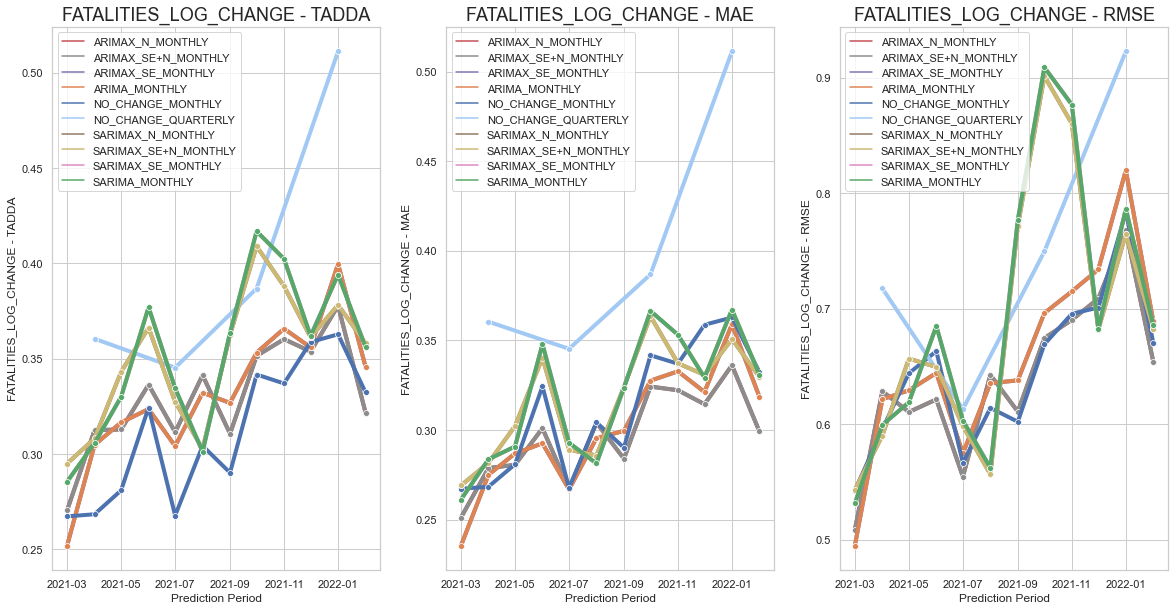

In [12]:
plot_period_loss(predictions_by_month, DEP_VAR, METRICS, "MONTHLY", models_color_palette)

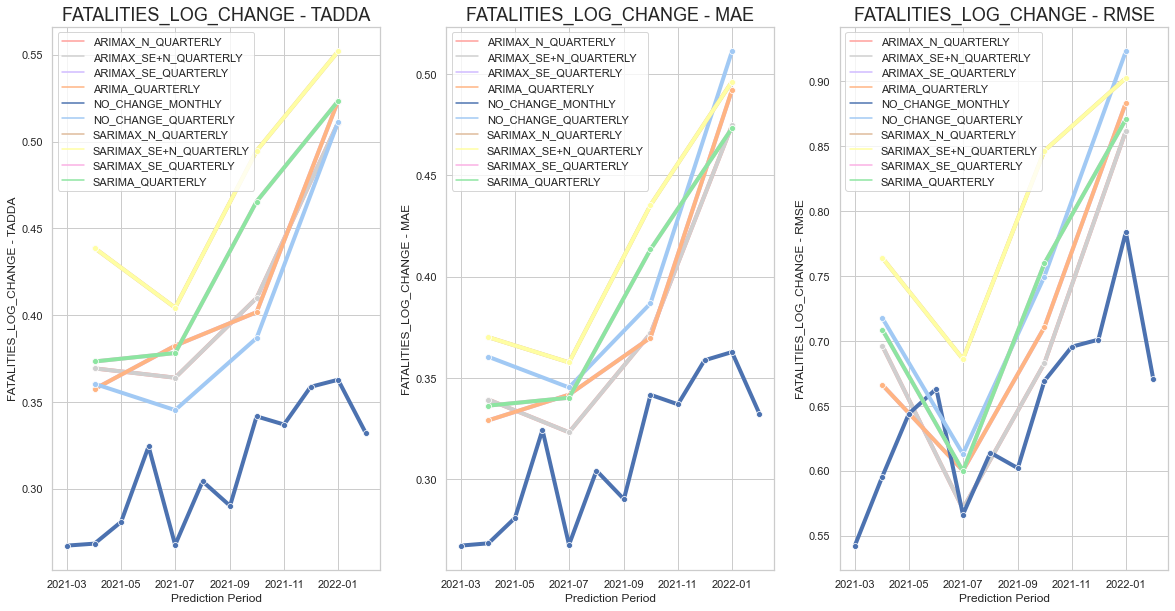

In [13]:
plot_period_loss(predictions_by_month, DEP_VAR, METRICS, "QUARTERLY", models_color_palette)

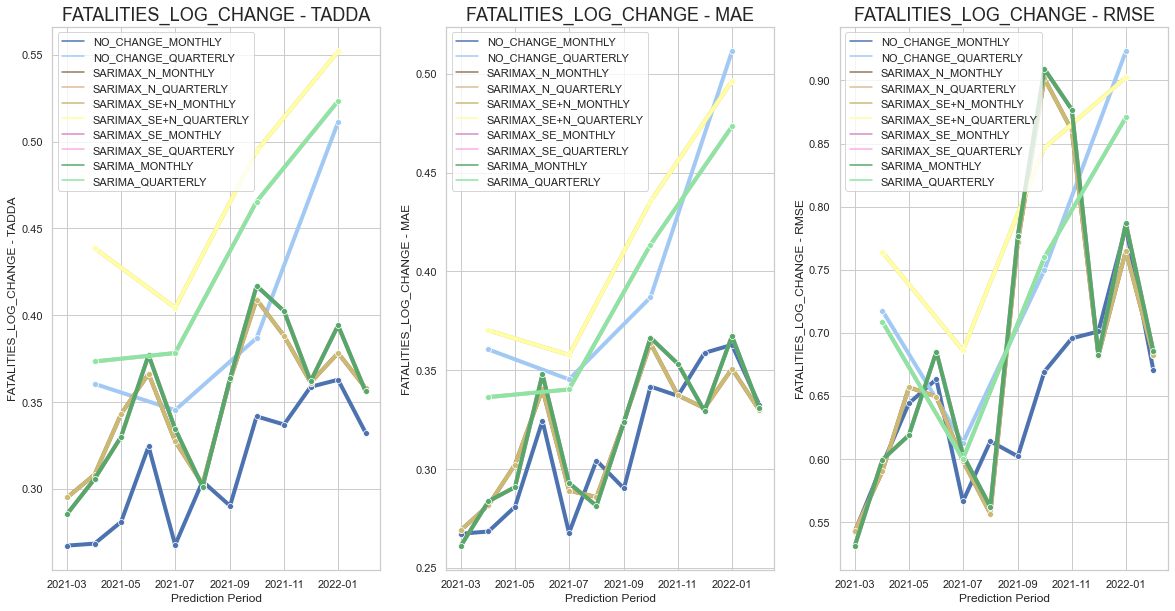

In [14]:
plot_period_loss(predictions_by_month, DEP_VAR, METRICS, "SARIMA", models_color_palette)

plot_period_loss
plot_outcomes_distribution
plot_outcomes_distribution_abs
plot_total_loss
nfl_model_dist_plot
load_gpd_world
plot_errors_on_map
get_prediction_period_counts

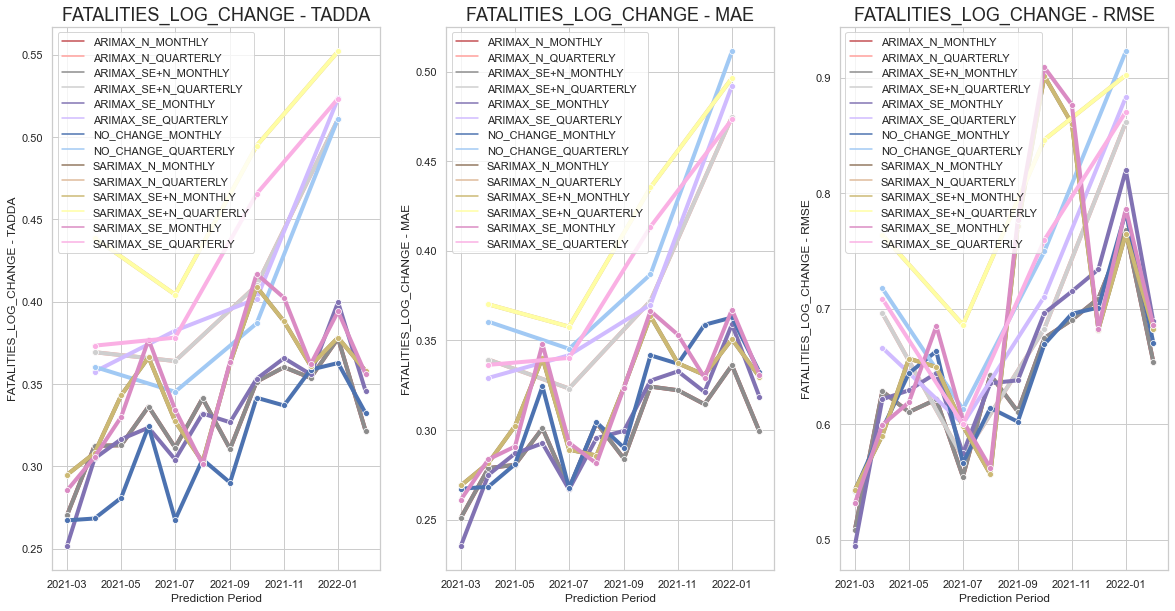

In [15]:
plot_period_loss(predictions_by_month, DEP_VAR, METRICS, "ARIMAX", models_color_palette)

### 1.2 Aggregation by COUNTRY 

In [16]:
# mean
predictions_by_country = all_predictions.groupby(by = ["MODEL", "GID_0"]).mean().reset_index()
# add standard deviations 
predictions_by_country_std = all_predictions.groupby(by = ["MODEL", "GID_0"]).std().reset_index()
predictions_by_country_std = predictions_by_country_std.add_suffix('_STD')
predictions_by_country = pd.concat([predictions_by_country, predictions_by_country_std[["FAT_PRED_STD", "FAT_ACTUAL_STD", "LC(FAT_PRED)_STD", "LC(FAT_ACTUAL)_STD", "TADDA_STD", "MAE_STD", "RMSE_STD"]]], axis = 1)

predictions_by_country

MODEL GID_0      FAT_PRED    FAT_ACTUAL  LC(FAT_PRED)  \
0     ARIMAX_N_MONTHLY   ABW  0.000000e+00  0.000000e+00  0.000000e+00   
1     ARIMAX_N_MONTHLY   AFG           NaN           NaN -3.195133e-02   
2     ARIMAX_N_MONTHLY   AGO  1.474132e+02  1.576436e+04  6.661338e-16   
3     ARIMAX_N_MONTHLY   AIA  0.000000e+00  0.000000e+00  0.000000e+00   
4     ARIMAX_N_MONTHLY   ALB  0.000000e+00  1.431902e-01  0.000000e+00   
...                ...   ...           ...           ...           ...   
4081  SARIMA_QUARTERLY   XKX  0.000000e+00  0.000000e+00  0.000000e+00   
4082  SARIMA_QUARTERLY   YEM           NaN           NaN  7.477745e-03   
4083  SARIMA_QUARTERLY   ZAF  1.670785e+20  3.260452e+51 -2.788741e-01   
4084  SARIMA_QUARTERLY   ZMB  1.908554e+01  2.834511e+02  2.220446e-16   
4085  SARIMA_QUARTERLY   ZWE  5.359815e+01  1.497625e+04  2.220446e-16   

      LC(FAT_ACTUAL)     TADDA       MAE      RMSE  FAT_PRED_STD  \
0           0.000000  0.000000  0.000000  0.000000  0.000000e+00   
1          -0.917136  1.615024  1.603189  3.514555           NaN   
2          -0.332996  0.678408  0.678408  0.689837  0.000000e+00   
3           0.000000  0.000000  0.000000  0.000000  0.000000e+00   
4           0.057762  0.057762  0.057762  0.040038  0.000000e+00   
...              ...       ...       ...       ...           ...   
4081        0.000000  0.000000  0.000000  0.000000  0.000000e+00   
4082       -0.313954  0.346363  0.321432  0.142596           NaN   
4083        0.127297  0.687885  0.484190  0.312127  2.378405e+20   
4084       -0.173287  0.519860  0.519860  0.600566  0.000000e+00   
4085       -0.092332  0.530066  0.530066  0.334531  0.000000e+00   

      FAT_ACTUAL_STD  LC(FAT_PRED)_STD  LC(FAT_ACTUAL)_STD  TADDA_STD  \
0       0.000000e+00          0.000000            0.000000   0.000000   
1                NaN          0.011226            1.724605   1.005802   
2       4.671175e+04          0.000000            0.794722   0.500472   
3       0.000000e+00          0.000000            0.000000   0.000000   
4       4.960252e-01          0.000000            0.200094   0.200094   
...              ...               ...                 ...        ...   
4081    0.000000e+00          0.000000            0.000000   0.000000   
4082             NaN          0.075048            0.272017   0.233487   
4083    6.520904e+51          0.072864            0.473208   0.418376   
4084    5.415295e+02          0.000000            0.872191   0.663638   
4085    2.993126e+04          0.000000            0.659299   0.267236   

       MAE_STD  RMSE_STD  
0     0.000000  0.000000  
1     1.014983  3.414466  
2     0.500472  0.890780  
3     0.000000  0.000000  
4     0.200094  0.138695  
...        ...       ...  
4081  0.000000  0.000000  
4082  0.228844  0.146609  
4083  0.321841  0.360031  
4084  0.663638  0.909483  
4085  0.267236  0.304662  

[4086 rows x 16 columns]

In [17]:
def plot_world_map(df, model_at_display, metric_at_display):
    """
    df: pd.DataFrame, predictions_by_country
    model_at_display: string
    metric_at_display: string
    """
    # prepare df for plot
    if model_at_display != "":
        df = df[df["MODEL"] == model_at_display]

        
    fig = px.choropleth(df, locations = "GID_0",
                    color = metric_at_display,
                    hover_name = "GID_0", # column to add to hover information
                    color_continuous_scale = "reds",
                    color_continuous_midpoint  = np.mean(df[metric_at_display]),
                    range_color = (0, max(df[metric_at_display])))
#     fig.title(str(model_at_display) + ": Prediction Error by Country")
    print(metric_at_display + " average: " + str(np.mean(df[metric_at_display])))
    fig.show()

In [18]:
model_at_display = 'ARIMAX_N_MONTHLY'
metric_at_display = 'MAE'

# plot on world map
plot_world_map(predictions_by_country, model_at_display, metric_at_display)

MAE average: 0.2969613529468596


### 1.3 Global Mean

In [19]:
predictions_global = all_predictions.groupby(by = ["MODEL"]).mean().reset_index()
predictions_global

MODEL    FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0         ARIMAX_N_MONTHLY         NaN         NaN     -0.031463   
1       ARIMAX_N_QUARTERLY         NaN         NaN     -0.038037   
2      ARIMAX_SE+N_MONTHLY         NaN         NaN     -0.031463   
3    ARIMAX_SE+N_QUARTERLY         NaN         NaN     -0.038037   
4        ARIMAX_SE_MONTHLY         NaN         NaN     -0.038039   
5      ARIMAX_SE_QUARTERLY         NaN         NaN     -0.033170   
6            ARIMA_MONTHLY         NaN         NaN     -0.038039   
7          ARIMA_QUARTERLY         NaN         NaN     -0.033170   
8        NO_CHANGE_MONTHLY   44.960352   53.191630      0.000000   
9      NO_CHANGE_QUARTERLY  145.484581  146.287445      0.000000   
10       SARIMAX_N_MONTHLY         NaN         NaN      0.025272   
11     SARIMAX_N_QUARTERLY         NaN         NaN      0.019886   
12    SARIMAX_SE+N_MONTHLY         NaN         NaN      0.025272   
13  SARIMAX_SE+N_QUARTERLY         NaN         NaN      0.019886   
14      SARIMAX_SE_MONTHLY         NaN         NaN      0.030249   
15    SARIMAX_SE_QUARTERLY         NaN         NaN     -0.020017   
16          SARIMA_MONTHLY         NaN         NaN      0.030249   
17        SARIMA_QUARTERLY         NaN         NaN     -0.020017   

    LC(FAT_ACTUAL)     TADDA       MAE      RMSE  
0         0.050536  0.330088  0.296961  0.413239  
1        -0.013965  0.413575  0.377333  0.504938  
2         0.050536  0.330088  0.296961  0.413239  
3        -0.013965  0.413575  0.377333  0.504938  
4         0.050536  0.331732  0.300964  0.438873  
5        -0.013965  0.416287  0.383240  0.522418  
6         0.050536  0.331732  0.300964  0.438873  
7        -0.013965  0.416287  0.383240  0.522418  
8         0.050536  0.311341  0.311341  0.421059  
9        -0.013965  0.400985  0.400985  0.576259  
10        0.050536  0.349994  0.317053  0.485806  
11       -0.013965  0.472446  0.414885  0.646442  
12        0.050536  0.349994  0.317053  0.485806  
13       -0.013965  0.472446  0.414885  0.646442  
14        0.050536  0.352436  0.319086  0.494077  
15       -0.013965  0.435126  0.390863  0.549438  
16        0.050536  0.352436  0.319086  0.494077  
17       -0.013965  0.435126  0.390863  0.549438

In [49]:
def plot_total_loss(total_errors, dep_var, metrics, models_color_palette):
    
    rotate_x_degree = 90

    fig, ax = plt.subplots(1, len(metrics), figsize=(20,10))    
    plt.tight_layout()
    
    x_ticks_labels = list(total_errors.MODEL)
    
    for i, metric in enumerate(metrics):
        plot_df = total_errors[['MODEL', metric]]

        sns.barplot(x=plot_df['MODEL'], y=plot_df[metric], hue=plot_df['MODEL'], 
                    dodge=False, palette=models_color_palette, ax=ax[i])
        sns.set(font_scale = 1)
        
        ax[i].set_xticklabels(x_ticks_labels, rotation=rotate_x_degree)

        for p in ax[i].patches:
            ax[i].annotate(format(p.get_height(), '.3f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        
                           
        ax[i].set_title(dep_var + ' - AVG ' + metric, fontsize=18)
#         ax[i].set_ylabel(dep_var + ' - ' + metric, fontsize=18)
        ax[i].set_xlabel('')
        ax[i].legend([],[], frameon=False)

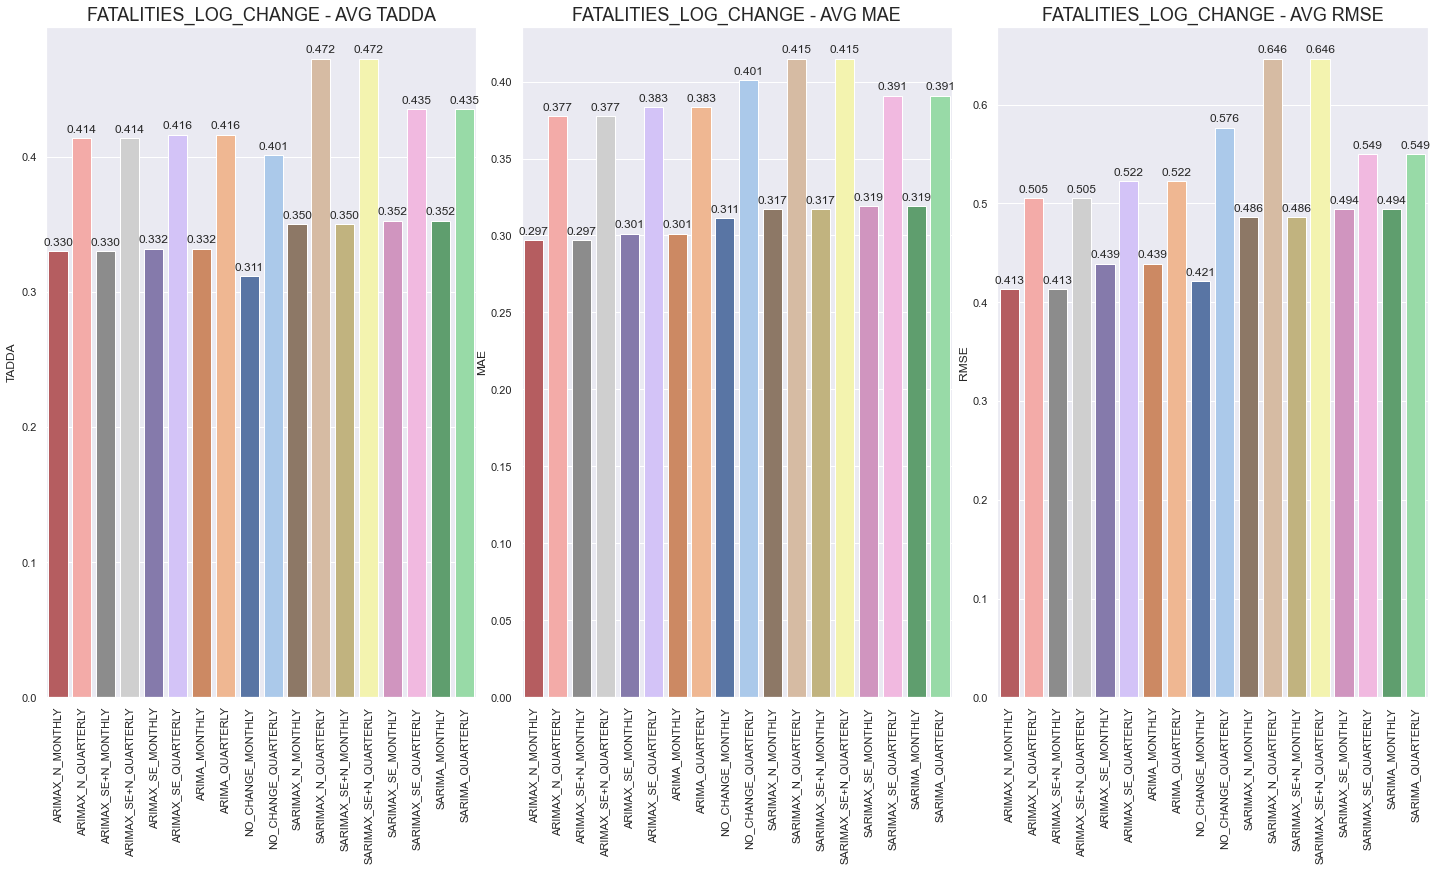

In [50]:
# S-VARIMAX before modification and less hyperparamters:
# 0.437 TADDA, 0.373 MAE, 0.664 MSE

plot_total_loss(predictions_global, DEP_VAR, METRICS, models_color_palette)

### 1.4 Composition of the Models

In [22]:
all_predictions["PARAMETER_NAN_COUNT"] = np.where((all_predictions['PARAMETERS'].isnull()), 1, 0) 
all_predictions["1"] = 1
all_predictions

MONTH   FAT_PRED    FAT_ACTUAL  LC(FAT_PRED)  LC(FAT_ACTUAL) GID_0  \
0     2021-03-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
1     2021-04-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
2     2021-05-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
3     2021-06-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
4     2021-07-01   0.000000      0.000000  0.000000e+00        0.000000   ABW   
...          ...        ...           ...           ...             ...   ...   
33691 2022-01-01  15.159317      0.000000 -5.591004e-02       -1.386294   ZMB   
33692 2021-04-01  53.598150      6.389056  2.220446e-16       -0.510826   ZWE   
33693 2021-07-01  53.598150      6.389056  2.220446e-16       -0.510826   ZWE   
33694 2021-10-01  53.598150  59873.141715  2.220446e-16        0.875469   ZWE   
33695 2022-01-01  53.598150     19.085537  2.220446e-16       -0.223144   ZWE   

                                              PARAMETERS  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
33691  {'params': [2, (1, 0, 2), (1, 0, 2, 4), 'n'], ...   
33692  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33693  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33694  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   
33695  {'params': [0, (0, 1, 0), (0, 0, 0, 4), 'n'], ...   

                        TIMESTAMP                   MODEL     TADDA       MAE  \
0      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  0.000000  0.000000   
1      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  0.000000  0.000000   
2      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  0.000000  0.000000   
3      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  0.000000  0.000000   
4      2022-07-26 15:18:58.333979       NO_CHANGE_MONTHLY  0.000000  0.000000   
...                           ...                     ...       ...       ...   
33691  2022-09-02 15:40:54.904194  SARIMAX_SE+N_QUARTERLY  1.330384  1.330384   
33692  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  0.510826  0.510826   
33693  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  0.510826  0.510826   
33694  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  0.875469  0.875469   
33695  2022-09-02 15:51:33.328773  SARIMAX_SE+N_QUARTERLY  0.223144  0.223144   

           RMSE  PARAMETER_NAN_COUNT  1  
0      0.000000                    1  1  
1      0.000000                    1  1  
2      0.000000                    1  1  
3      0.000000                    1  1  
4      0.000000                    1  1  
...         ...                  ... ..  
33691  1.769922                    0  1  
33692  0.260943                    0  1  
33693  0.260943                    0  1  
33694  0.766446                    0  1  
33695  0.049793                    0  1  

[32688 rows x 14 columns]

In [23]:
agg = all_predictions[["MODEL", "PARAMETER_NAN_COUNT", "1"]].groupby(by = ["MODEL"]).sum()
agg

PARAMETER_NAN_COUNT     1
MODEL                                            
ARIMAX_N_MONTHLY                       1128  2724
ARIMAX_N_QUARTERLY                      392   908
ARIMAX_SE+N_MONTHLY                    1128  2724
ARIMAX_SE+N_QUARTERLY                   392   908
ARIMAX_SE_MONTHLY                      1128  2724
ARIMAX_SE_QUARTERLY                     396   908
ARIMA_MONTHLY                          1128  2724
ARIMA_QUARTERLY                         396   908
NO_CHANGE_MONTHLY                      2724  2724
NO_CHANGE_QUARTERLY                     908   908
SARIMAX_N_MONTHLY                      1128  2724
SARIMAX_N_QUARTERLY                     380   908
SARIMAX_SE+N_MONTHLY                   1128  2724
SARIMAX_SE+N_QUARTERLY                  380   908
SARIMAX_SE_MONTHLY                     1128  2724
SARIMAX_SE_QUARTERLY                    376   908
SARIMA_MONTHLY                         1128  2724
SARIMA_QUARTERLY                        376   908

In [24]:
predictions_global["PARAMETER_NAN_COUNT"] = agg["PARAMETER_NAN_COUNT"].values
predictions_global["1"] = agg["1"].values
predictions_global["PCT_NO_CHANGE"] = predictions_global["PARAMETER_NAN_COUNT"] / predictions_global["1"]
predictions_global["PCT_MODEL"] = 1 - predictions_global["PCT_NO_CHANGE"]
predictions_global

MODEL    FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0         ARIMAX_N_MONTHLY         NaN         NaN     -0.031463   
1       ARIMAX_N_QUARTERLY         NaN         NaN     -0.038037   
2      ARIMAX_SE+N_MONTHLY         NaN         NaN     -0.031463   
3    ARIMAX_SE+N_QUARTERLY         NaN         NaN     -0.038037   
4        ARIMAX_SE_MONTHLY         NaN         NaN     -0.038039   
5      ARIMAX_SE_QUARTERLY         NaN         NaN     -0.033170   
6            ARIMA_MONTHLY         NaN         NaN     -0.038039   
7          ARIMA_QUARTERLY         NaN         NaN     -0.033170   
8        NO_CHANGE_MONTHLY   44.960352   53.191630      0.000000   
9      NO_CHANGE_QUARTERLY  145.484581  146.287445      0.000000   
10       SARIMAX_N_MONTHLY         NaN         NaN      0.025272   
11     SARIMAX_N_QUARTERLY         NaN         NaN      0.019886   
12    SARIMAX_SE+N_MONTHLY         NaN         NaN      0.025272   
13  SARIMAX_SE+N_QUARTERLY         NaN         NaN      0.019886   
14      SARIMAX_SE_MONTHLY         NaN         NaN      0.030249   
15    SARIMAX_SE_QUARTERLY         NaN         NaN     -0.020017   
16          SARIMA_MONTHLY         NaN         NaN      0.030249   
17        SARIMA_QUARTERLY         NaN         NaN     -0.020017   

    LC(FAT_ACTUAL)     TADDA       MAE      RMSE  PARAMETER_NAN_COUNT     1  \
0         0.050536  0.330088  0.296961  0.413239                 1128  2724   
1        -0.013965  0.413575  0.377333  0.504938                  392   908   
2         0.050536  0.330088  0.296961  0.413239                 1128  2724   
3        -0.013965  0.413575  0.377333  0.504938                  392   908   
4         0.050536  0.331732  0.300964  0.438873                 1128  2724   
5        -0.013965  0.416287  0.383240  0.522418                  396   908   
6         0.050536  0.331732  0.300964  0.438873                 1128  2724   
7        -0.013965  0.416287  0.383240  0.522418                  396   908   
8         0.050536  0.311341  0.311341  0.421059                 2724  2724   
9        -0.013965  0.400985  0.400985  0.576259                  908   908   
10        0.050536  0.349994  0.317053  0.485806                 1128  2724   
11       -0.013965  0.472446  0.414885  0.646442                  380   908   
12        0.050536  0.349994  0.317053  0.485806                 1128  2724   
13       -0.013965  0.472446  0.414885  0.646442                  380   908   
14        0.050536  0.352436  0.319086  0.494077                 1128  2724   
15       -0.013965  0.435126  0.390863  0.549438                  376   908   
16        0.050536  0.352436  0.319086  0.494077                 1128  2724   
17       -0.013965  0.435126  0.390863  0.549438                  376   908   

    PCT_NO_CHANGE  PCT_MODEL  
0        0.414097   0.585903  
1        0.431718   0.568282  
2        0.414097   0.585903  
3        0.431718   0.568282  
4        0.414097   0.585903  
5        0.436123   0.563877  
6        0.414097   0.585903  
7        0.436123   0.563877  
8        1.000000   0.000000  
9        1.000000   0.000000  
10       0.414097   0.585903  
11       0.418502   0.581498  
12       0.414097   0.585903  
13       0.418502   0.581498  
14       0.414097   0.585903  
15       0.414097   0.585903  
16       0.414097   0.585903  
17       0.414097   0.585903

In [47]:
def plot_composition():
    fig, ax = plt.subplots(9, 2, figsize=(10,20))  
    plt.tight_layout()
    plt.title("Percentage of countries with succesful ARIMA-model fit")
    
    for (i, model) in enumerate(MONTHLY_MODELS):
#         print(model)
        x = np.array(predictions_global[predictions_global["MODEL"] == model][["PCT_NO_CHANGE", "PCT_MODEL"]]).flatten()
        labels = ["NO_CHANGE", model]
        colors = sns.color_palette('pastel')[0:2]
#         print(x.shape)
        
        ax[i,0].pie(x = x, labels = labels, colors = colors, autopct='%.0f%%')
        
    for (i, model) in enumerate(QUARTERLY_MODELS):
#         print(model)
        x = np.array(predictions_global[predictions_global["MODEL"] == model][["PCT_NO_CHANGE", "PCT_MODEL"]]).flatten()
        labels = ["NO_CHANGE", model]
        colors = sns.color_palette('pastel')[0:2]
#         print(x.shape)
        
        ax[i,1].pie(x = x, labels = labels, colors = colors, autopct='%.0f%%')
        
        
    plt.show()

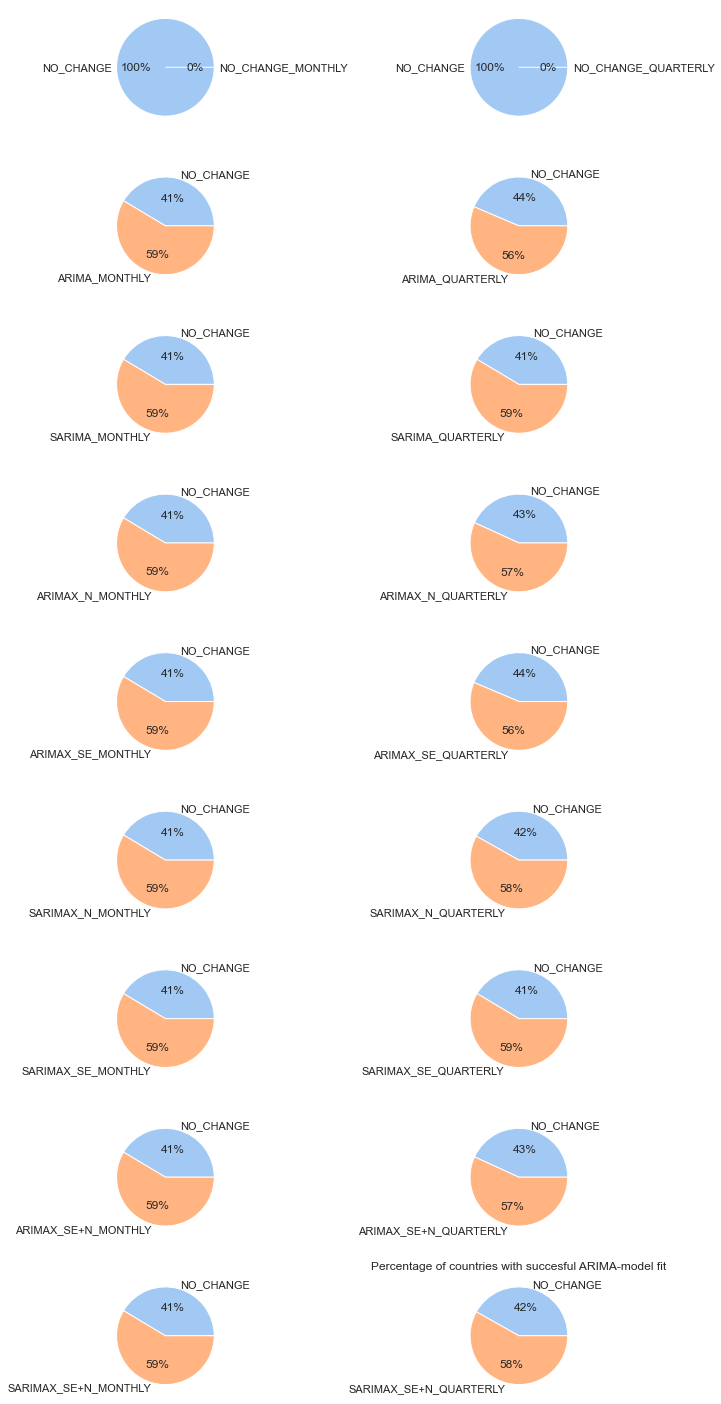

In [48]:
plot_composition()

## 2 Prediction Analysis - Key Findings

#### 2.1 Outperforming the global performance of the NO_CHANGE-model is hard.
#### 2.2 ARIMA outperforms the NO_CHANGE-model in countries with at least 1 conflict fatality. 
#### 2.2 Monthly models clearly outperform quarterly models.
####    2.3 Less complex models yield better prediction results.
####    2.4 The best model performs better in countries with little conflict fatalities
####    2.5 Countries with a high volatility in conflict fatalities are harder too predict
####    2.6 The model performance depends on the geographic region
####    2.7 Model performance get worse with rising forecast horizon.

####    2.7 ARIMA predictions model can be outperformed for the one-step ahead forecast

### 2.1 The model performance depends on the geographic region 
Filtern nach FAT type (state/non-state)
Ergebnisse analysieren nach Ländern, Länderkategorien, ausschließen
- Best ARIMA
- NO_CHANGE
- ARIMA-NOCHANGE

In [90]:
no_change = predictions_by_country[predictions_by_country["MODEL"] == "NO_CHANGE_MONTHLY"].reset_index(drop=True)
arima = predictions_by_country[predictions_by_country["MODEL"] == "ARIMA_MONTHLY"].reset_index(drop=True)

diff_nochange_arima = arima[["TADDA", "MAE", "RMSE"]].subtract(nochange[["TADDA", "MAE", "RMSE"]])
diff_nochange_arima["GID_0"] = arima["GID_0"]
diff_nochange_arima["MODEL"] = "ARIMA-NO_CHANGE_MONTHLY"

In [91]:
plot_world_map(no_change,"", "MAE")

MAE average: 0.3113414256279672


In [92]:
plot_world_map(arima,"", "MAE")

MAE average: 0.30096449984799234


In [93]:
plot_world_map(diff_nochange_arima,"", "MAE")

MAE average: -0.010376925779974813


In [29]:
diff_nochange_arima

TADDA           MAE          RMSE GID_0                    MODEL
0    0.000000e+00  0.000000e+00  0.000000e+00   ABW  ARIMA-NO_CHANGE_MONTHLY
1    2.655062e-02  5.900137e-03  6.618796e-02   AFG  ARIMA-NO_CHANGE_MONTHLY
2    3.330669e-16  2.220446e-16  4.440892e-16   AGO  ARIMA-NO_CHANGE_MONTHLY
3    0.000000e+00  0.000000e+00  0.000000e+00   AIA  ARIMA-NO_CHANGE_MONTHLY
4    0.000000e+00  0.000000e+00  0.000000e+00   ALB  ARIMA-NO_CHANGE_MONTHLY
..            ...           ...           ...   ...                      ...
222  0.000000e+00  0.000000e+00  0.000000e+00   XKX  ARIMA-NO_CHANGE_MONTHLY
223  1.369654e-03 -7.093052e-03 -9.864901e-03   YEM  ARIMA-NO_CHANGE_MONTHLY
224  3.324340e-01  1.317302e-01  1.807515e-01   ZAF  ARIMA-NO_CHANGE_MONTHLY
225 -1.110223e-16 -1.110223e-16 -2.220446e-16   ZMB  ARIMA-NO_CHANGE_MONTHLY
226  0.000000e+00  0.000000e+00  0.000000e+00   ZWE  ARIMA-NO_CHANGE_MONTHLY

[227 rows x 5 columns]

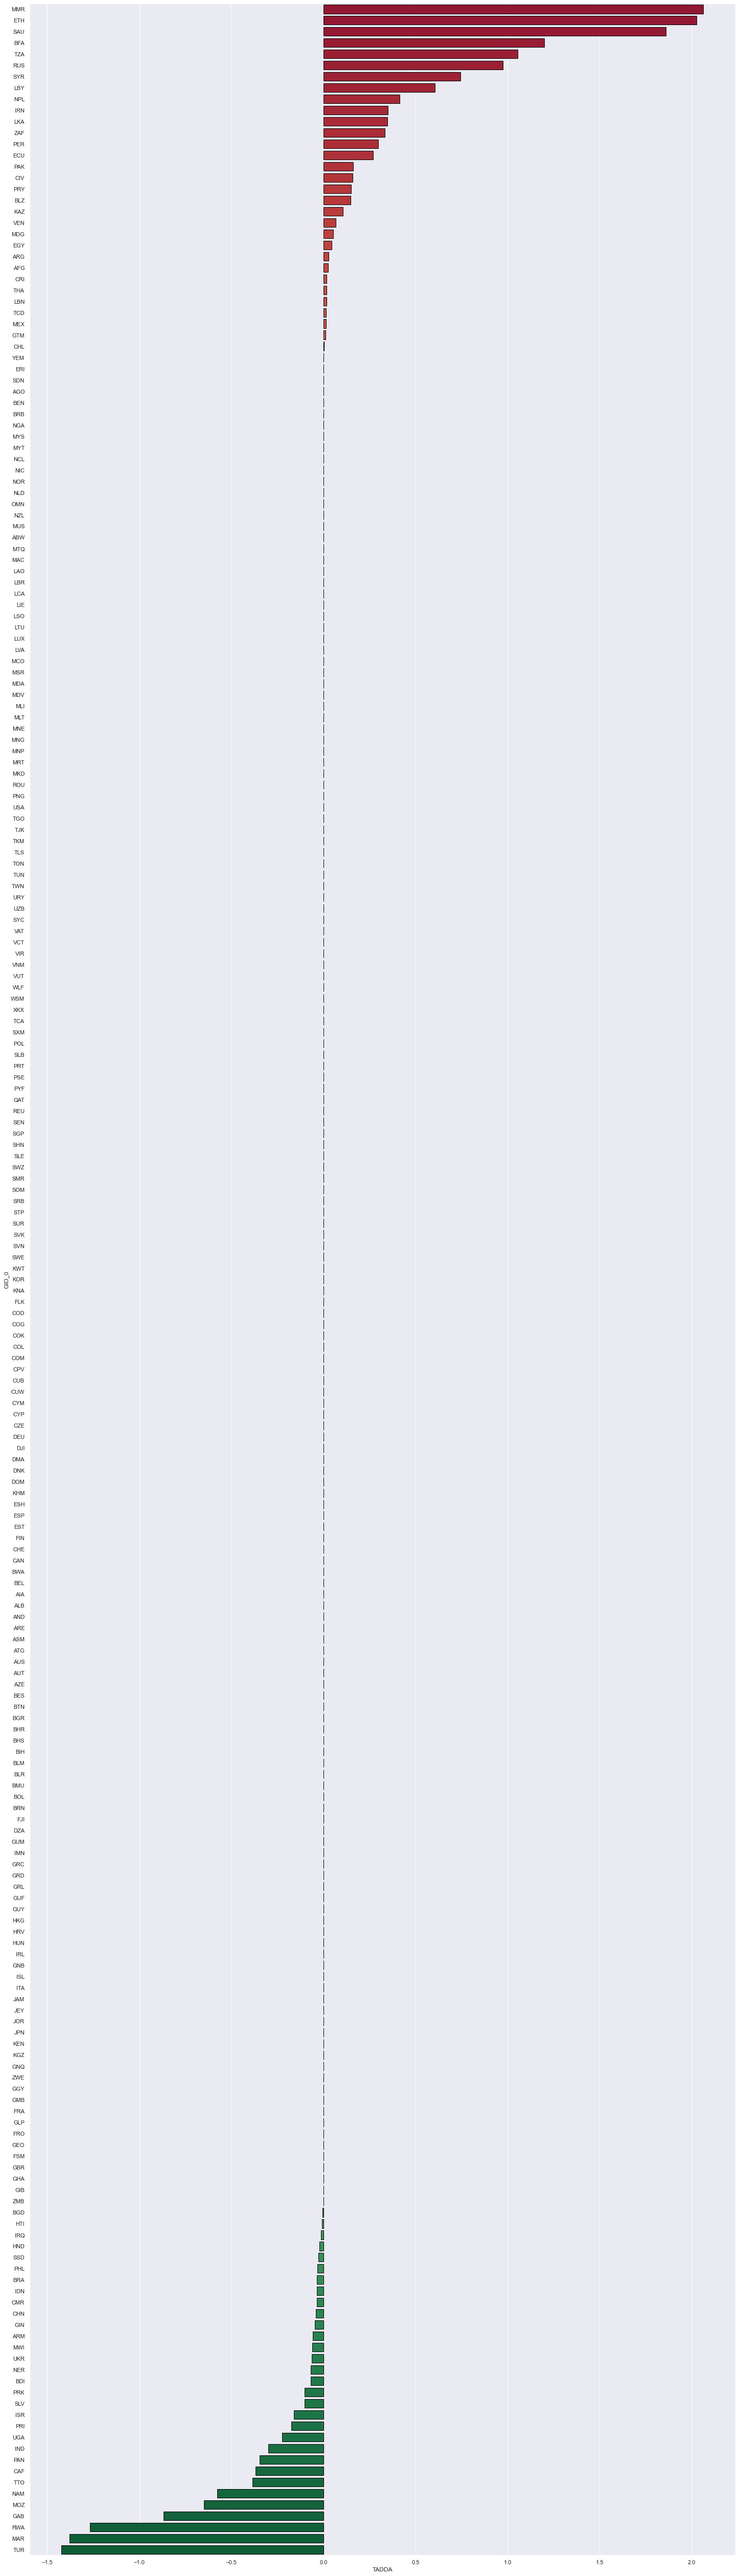

In [30]:
import matplotlib
from matplotlib.colors import TwoSlopeNorm

dep_var = "FATALITIES_LOG_CHANGE"
model = "S-VARIMA_MONTHLY"

# Initialize the matplotlib figure
fig, ax = plt.subplots(1, 1, figsize=(20,70))  
fig.tight_layout()

for i, metric in enumerate(["TADDA"]):

    # select metric
    data = (diff_nochange_arima.sort_values(by=metric, ascending=False))
    # print(data)

    # theme and color settings
    sns.set_theme(style="whitegrid")
    norm = TwoSlopeNorm(vmin=-2.5, vcenter=0, vmax=7.5)
    red_green_pal = sns.diverging_palette(h_neg=0, h_pos=200, as_cmap=True)
    colors = [red_green_pal(norm(c)) for c in data[metric]]

    sns.barplot(x=metric, y="GID_0", data=data, ci=None, palette="RdYlGn", edgecolor='black', ax=ax)
    
plt.show()

### 2.2 Monthly models outperform quarterly models

In [31]:
# filter models
# monhtly_models = [string for string in MODELS if "MONTHLY" in string]
global_pred_monthly = predictions_global[predictions_global["MODEL"].isin(MONTHLY_MODELS)]
print("Global average of monthly models:\n", np.mean(global_pred_monthly[["TADDA", "MAE", "RMSE"]]))

Global average of monthly models:
 TADDA    0.337760
MAE      0.308830
RMSE     0.453894
dtype: float64


In [32]:
# filter models
# quarterly_models = [string for string in MODELS if "QUARTERLY" in string]
global_pred_quarterly = predictions_global[predictions_global["MODEL"].isin(QUARTERLY_MODELS)]
print("Global average of quarterly models:\n", np.mean(global_pred_quarterly[["TADDA", "MAE", "RMSE"]]))

Global average of quarterly models:
 TADDA    0.430650
MAE      0.392625
RMSE     0.558082
dtype: float64


In [33]:
# difference
diff_monthly_quarterly = np.mean(global_pred_quarterly[["TADDA", "MAE", "RMSE"]]) - np.mean(global_pred_monthly[["TADDA", "MAE", "RMSE"]])
print("Global average of quarterly models:\n", diff_monthly_quarterly)

Global average of quarterly models:
 TADDA    0.092890
MAE      0.083795
RMSE     0.104187
dtype: float64


### 2.3 Less complex (seasonality) models yield better prediction results
S, X, V ---> X LOCV
Reason: wrong seasonal periodicity or no seasonality in data

### 2.4 The best model performs better in countries with little conflict fatalities

In [34]:
predictions_by_country[predictions_by_country.isna().any(axis=1)]

MODEL GID_0       FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
1     ARIMAX_N_MONTHLY   AFG            NaN         NaN -3.195133e-02   
65    ARIMAX_N_MONTHLY   ETH  3.913100e+100         NaN -1.165792e+00   
132   ARIMAX_N_MONTHLY   MEX  1.905257e+301         NaN  1.704160e-02   
136   ARIMAX_N_MONTHLY   MMR   2.317808e+24         NaN -8.945531e-01   
151   ARIMAX_N_MONTHLY   NGA            NaN         NaN  1.776357e-15   
...                ...   ...            ...         ...           ...   
3995  SARIMA_QUARTERLY   MMR  1.124002e+176         NaN -1.274066e+00   
4010  SARIMA_QUARTERLY   NGA            NaN         NaN -5.820597e-01   
4043  SARIMA_QUARTERLY   SOM            NaN         NaN -8.581993e-02   
4054  SARIMA_QUARTERLY   SYR            NaN         NaN  7.690471e-02   
4082  SARIMA_QUARTERLY   YEM            NaN         NaN  7.477745e-03   

      LC(FAT_ACTUAL)     TADDA       MAE       RMSE   FAT_PRED_STD  \
1          -0.917136  1.615024  1.603189   3.514555            NaN   
65          0.410768  2.529538  1.576560   2.760311  1.355538e+101   
132        -0.047070  0.120197  0.112117   0.036084            inf   
136         2.689890  4.478996  3.584443  13.566972   8.027343e+24   
151        -0.048829  0.172489  0.172489   0.046415            NaN   
...              ...       ...       ...        ...            ...   
3995        1.330568  3.878699  2.604633   7.190028            inf   
4010       -0.179792  0.402267  0.402267   0.248090            NaN   
4043       -0.122258  0.308497  0.271309   0.081118            NaN   
4054       -0.465312  0.623203  0.542217   0.324670            NaN   
4082       -0.313954  0.346363  0.321432   0.142596            NaN   

      FAT_ACTUAL_STD  LC(FAT_PRED)_STD  LC(FAT_ACTUAL)_STD  TADDA_STD  \
1                NaN          0.011226            1.724605   1.005802   
65               NaN          0.228196            0.499819   0.954349   
132              NaN          0.007175            0.185781   0.165426   
136              NaN          0.446994            0.485473   1.316089   
151              NaN          0.000000            0.219165   0.134823   
...              ...               ...                 ...        ...   
3995             NaN          0.452921            0.442364   1.138872   
4010             NaN          0.298614            0.177502   0.339158   
4043             NaN          0.030646            0.335567   0.113392   
4054             NaN          0.071303            0.242918   0.186140   
4082             NaN          0.075048            0.272017   0.233487   

       MAE_STD  RMSE_STD  
1     1.014983  3.414466  
65    0.547494  1.832731  
132   0.160162  0.105002  
136   0.885485  6.316757  
151   0.134823  0.060733  
...        ...       ...  
3995  0.735677  3.413716  
4010  0.339158  0.279529  
4043  0.100066  0.051213  
4054  0.202227  0.219763  
4082  0.228844  0.146609  

[164 rows x 16 columns]

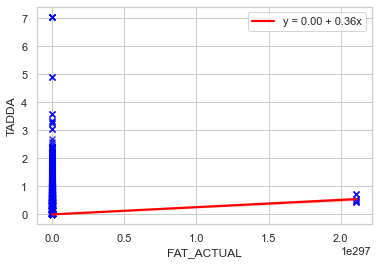

In [35]:
# remove np.exp() after rerun!
x = (predictions_by_country["FAT_ACTUAL"])
y = predictions_by_country["TADDA"]

# get coeffs of linear fit
from scipy import stats
mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])

ax = sns.regplot(x = x,y = y, marker="x", ci=95, seed=0, color="r",
                 line_kws={'label':"y = {1:.2f} + {0:.2f}x".format(intercept, slope), "color": "red"},
                 scatter_kws={"color": "blue"})
ax.legend()

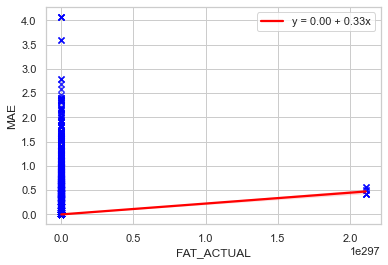

In [36]:
# remove np.exp() after rerun!
x = (predictions_by_country["FAT_ACTUAL"])
y = predictions_by_country["MAE"]

# get coeffs of linear fit
from scipy import stats
mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])

ax = sns.regplot(x = x,y = y, marker="x", ci=95, seed=0, color="r",
                 line_kws={'label':"y = {1:.2f} + {0:.2f}x".format(intercept, slope), "color": "red"},
                 scatter_kws={"color": "blue"})
ax.legend()

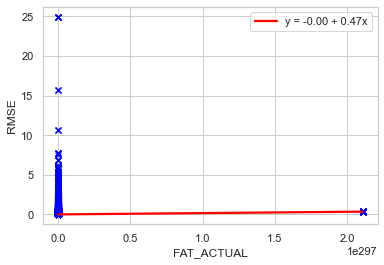

In [37]:
# remove np.exp() after rerun!
x = (predictions_by_country["FAT_ACTUAL"])
y = predictions_by_country["RMSE"]

# get coeffs of linear fit
from scipy import stats
mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])

ax = sns.regplot(x = x,y = y, marker="x", ci=95, seed=0, color="r",
                 line_kws={'label':"y = {1:.2f} + {0:.2f}x".format(intercept, slope), "color": "red"},
                 scatter_kws={"color": "blue"})
ax.legend()

### 2.5 Countries with a high volatility in conflict fatalities are harder too predict

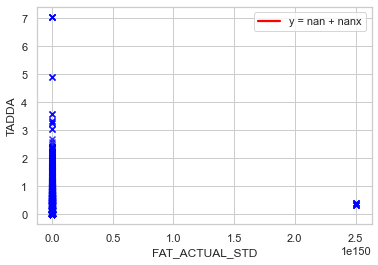

In [38]:
# remove np.exp() after rerun!
x = (predictions_by_country["FAT_ACTUAL_STD"])
y = (predictions_by_country["TADDA"])

# get coeffs of linear fit
from scipy import stats
mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])

ax = sns.regplot(x=x, y=y, marker="x", ci=95, seed=0, color="r",
                 line_kws={'label':"y = {1:.2f} + {0:.2f}x".format(intercept, slope), "color": "red"},
                 scatter_kws={"color": "blue"})
ax.legend()

### 2.7 No-Change model can be outperformed for the one-step ahead forecasts

In [88]:
# monthly models
one_step_forecast_monthly = predictions_by_month[predictions_by_month["MONTH"] == "2021-03-01"]

#quarterly models
one_step_forecast_quarterly = predictions_by_month[predictions_by_month["MONTH"] == "2021-04-01"]
one_step_forecast_quarterly = one_step_forecast_quarterly[one_step_forecast_quarterly["MODEL"].isin(QUARTERLY_MODELS)]

# combined
one_step_forecast = pd.concat([one_step_forecast_monthly, one_step_forecast_quarterly])
one_step_forecast

MODEL      MONTH    FAT_PRED  FAT_ACTUAL  LC(FAT_PRED)  \
0          ARIMAX_N_MONTHLY 2021-03-01         NaN         NaN     -0.002081   
16      ARIMAX_SE+N_MONTHLY 2021-03-01         NaN         NaN     -0.002081   
32        ARIMAX_SE_MONTHLY 2021-03-01         NaN         NaN     -0.019642   
48            ARIMA_MONTHLY 2021-03-01         NaN         NaN     -0.019642   
64        NO_CHANGE_MONTHLY 2021-03-01   44.960352   53.149780      0.000000   
80        SARIMAX_N_MONTHLY 2021-03-01         NaN         NaN      0.023816   
96     SARIMAX_SE+N_MONTHLY 2021-03-01         NaN         NaN      0.023816   
112      SARIMAX_SE_MONTHLY 2021-03-01         NaN         NaN      0.022023   
128          SARIMA_MONTHLY 2021-03-01         NaN         NaN      0.022023   
12       ARIMAX_N_QUARTERLY 2021-04-01         NaN         NaN     -0.018094   
28    ARIMAX_SE+N_QUARTERLY 2021-04-01         NaN         NaN     -0.018094   
44      ARIMAX_SE_QUARTERLY 2021-04-01         NaN         NaN     -0.017405   
60          ARIMA_QUARTERLY 2021-04-01         NaN         NaN     -0.017405   
76      NO_CHANGE_QUARTERLY 2021-04-01  145.484581  198.951542      0.000000   
92      SARIMAX_N_QUARTERLY 2021-04-01         NaN         NaN      0.048942   
108  SARIMAX_SE+N_QUARTERLY 2021-04-01         NaN         NaN      0.048942   
124    SARIMAX_SE_QUARTERLY 2021-04-01         NaN         NaN     -0.006994   
140        SARIMA_QUARTERLY 2021-04-01         NaN         NaN     -0.006994   

     LC(FAT_ACTUAL)     TADDA       MAE      RMSE  PARAMETER_NAN_COUNT    1  
0          0.034989  0.270534  0.251229  0.258692             0.414097  1.0  
16         0.034989  0.270534  0.251229  0.258692             0.414097  1.0  
32         0.034989  0.251978  0.235595  0.244885             0.414097  1.0  
48         0.034989  0.251978  0.235595  0.244885             0.414097  1.0  
64         0.034989  0.267294  0.267294  0.294385             1.000000  1.0  
80         0.034989  0.295008  0.269152  0.294957             0.414097  1.0  
96         0.034989  0.295008  0.269152  0.294957             0.414097  1.0  
112        0.034989  0.285505  0.261294  0.282451             0.414097  1.0  
128        0.034989  0.285505  0.261294  0.282451             0.414097  1.0  
12         0.124943  0.369385  0.339369  0.484853             0.431718  1.0  
28         0.124943  0.369385  0.339369  0.484853             0.431718  1.0  
44         0.124943  0.357502  0.329126  0.443961             0.436123  1.0  
60         0.124943  0.357502  0.329126  0.443961             0.436123  1.0  
76         0.124943  0.360486  0.360486  0.515103             1.000000  1.0  
92         0.124943  0.438715  0.370153  0.583838             0.418502  1.0  
108        0.124943  0.438715  0.370153  0.583838             0.418502  1.0  
124        0.124943  0.373365  0.336405  0.502432             0.414097  1.0  
140        0.124943  0.373365  0.336405  0.502432             0.414097  1.0

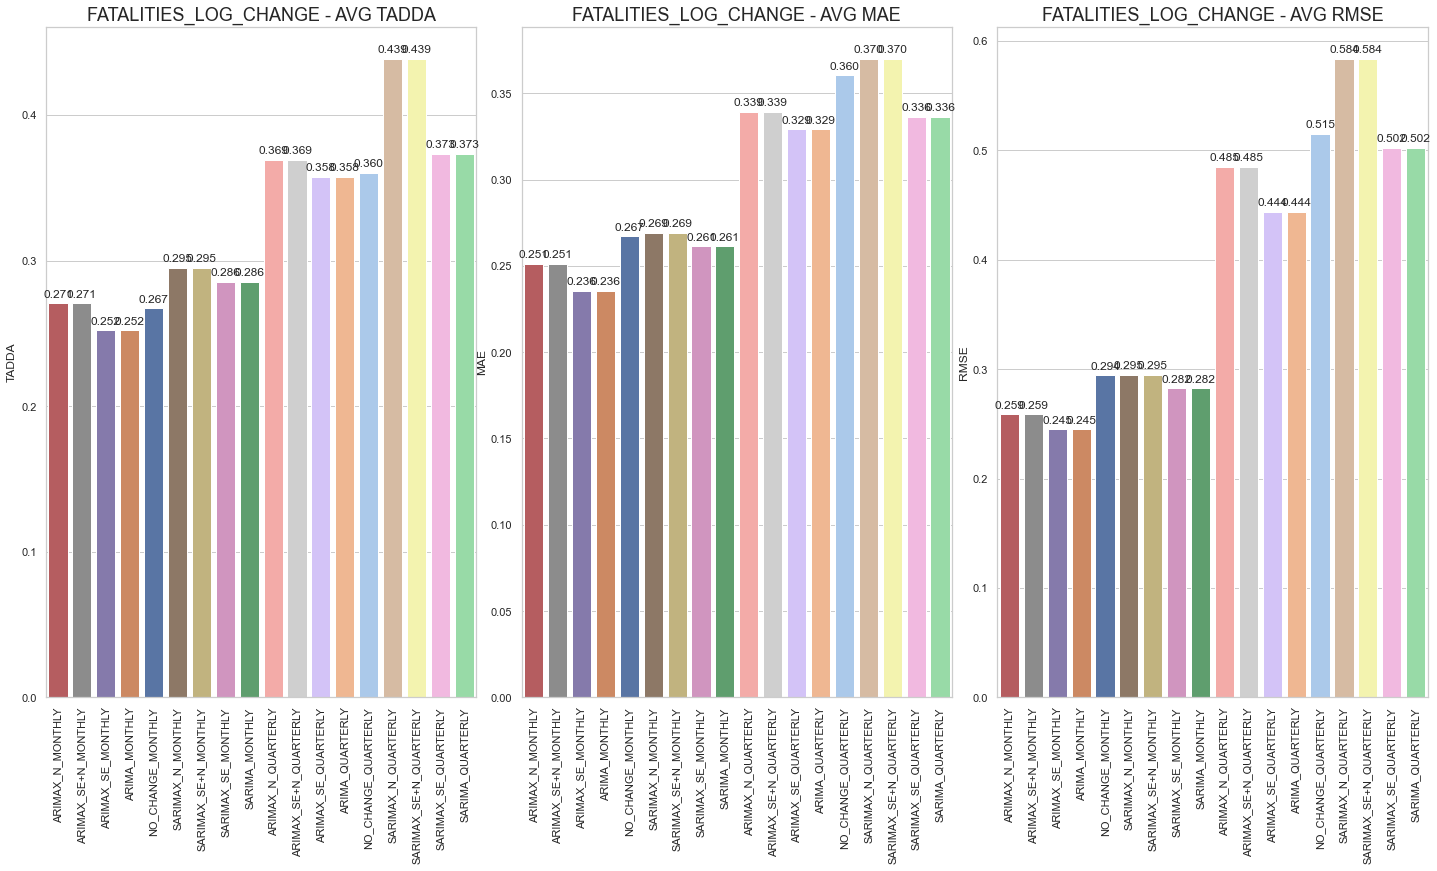

In [87]:
plot_total_loss(one_step_forecast, DEP_VAR, METRICS, models_color_palette)